In [1]:
!pip install tensorflow keras numpy pandas matplotlib seaborn opencv-python scikit-learn albumentations scipy h5py pillow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Convert Matlab to Python to convert .mat to .jpg

In [ ]:
import os
import h5py
import numpy as np
from PIL import Image

input_folder = "./Data"
output_folder = "./Output_Images"
os.makedirs(output_folder, exist_ok=True)

mat_files = [f for f in os.listdir(input_folder) if f.endswith(".mat")]

def save_as_jpg(image_array, output_path):
    image_normalized = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)) * 255
    image_normalized = image_normalized.astype(np.uint8) 
    
    image = Image.fromarray(image_normalized)
    image.save(output_path)

for file in mat_files:
    file_path = os.path.join(input_folder, file)
    
    with h5py.File(file_path, "r") as mat_data:
        print(f"Processing file: {file}")
        
        cjdata = mat_data['cjdata']
        
        image = np.array(cjdata['image'])  
        label = np.array(cjdata['label'])
        label_folder = os.path.join(output_folder, str(label[0][0]))  
        os.makedirs(label_folder, exist_ok=True)
        
        output_path = os.path.join(label_folder, file.replace(".mat", ".jpg"))
        save_as_jpg(image, output_path)
        print(f"Saved {file} as {output_path}")

Processing file: 1.mat
Saved 1.mat as ./Output_Images\1.0\1.jpg
Processing file: 10.mat
Saved 10.mat as ./Output_Images\1.0\10.jpg
Processing file: 100.mat
Saved 100.mat as ./Output_Images\1.0\100.jpg
Processing file: 1000.mat
Saved 1000.mat as ./Output_Images\3.0\1000.jpg
Processing file: 1001.mat
Saved 1001.mat as ./Output_Images\3.0\1001.jpg
Processing file: 1002.mat
Saved 1002.mat as ./Output_Images\3.0\1002.jpg
Processing file: 1003.mat
Saved 1003.mat as ./Output_Images\3.0\1003.jpg
Processing file: 1004.mat
Saved 1004.mat as ./Output_Images\3.0\1004.jpg
Processing file: 1005.mat
Saved 1005.mat as ./Output_Images\3.0\1005.jpg
Processing file: 1006.mat
Saved 1006.mat as ./Output_Images\3.0\1006.jpg
Processing file: 1007.mat
Saved 1007.mat as ./Output_Images\3.0\1007.jpg
Processing file: 1008.mat
Saved 1008.mat as ./Output_Images\3.0\1008.jpg
Processing file: 1009.mat
Saved 1009.mat as ./Output_Images\3.0\1009.jpg
Processing file: 101.mat
Saved 101.mat as ./Output_Images\1.0\101.jpg

In [2]:
from PIL import Image
import os
import numpy as np
for i in range(1,4):
    input_folder=str("./Output_Images/"+str(i)+".0")
    images = [f for f in os.listdir(input_folder) if f.endswith(('.jpg'))]
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        image = Image.open(image_path)
        image_array=np.array(image)
        # print(image_array.shape)
        # print(image_array.max(),image_array.min())
    # print(input_folder)

Preprocessing

In [ ]:
# from PIL import Image
# import os
# import numpy as np
# normalized_images=[]
# for i in range(1,4):
#     input_folder=str("./Output_Images/"+str(i)+".0")
#     images = [f for f in os.listdir(input_folder) if f.endswith(('.jpg'))]
#     for image_name in images:
#         image_path = os.path.join(input_folder, image_name)
#         image = Image.open(image_path)
#         gray_image = image.convert('L')
#         gray_image = gray_image.resize((256, 256))
#         image_array = np.array(gray_image)
#         image_array=image_array.reshape(256, 256, 1)
#         normalized_image = image_array / 255.0 #it should be between 0 and 1
#         normalized_images.append(normalized_image)
#     print(str(len(normalized_images))+" for folder"+str(i))



708 for folder1
2134 for folder2


MemoryError: Unable to allocate 512. KiB for an array with shape (256, 256, 1) and data type float64

In [3]:
from PIL import Image
import os
import numpy as np
import gc
normalized_images = []
for i in range(1, 4):
    input_folder = str("./Output_Images/" + str(i) + ".0")
    images = [f for f in os.listdir(input_folder) if f.endswith(('.jpg'))]
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        image = Image.open(image_path)
        gray_image = image.convert('L')
        gray_image = gray_image.resize((256, 256))
        image_array = np.array(gray_image, dtype=np.float32)
        image_array = image_array.reshape(256, 256, 1)
        normalized_image = image_array / 255.0
        normalized_images.append(normalized_image)
        del image_array
        del normalized_image
        gc.collect()
    print(str(len(normalized_images)) + " images processed for folder " + str(i))


708 images processed for folder 1
2134 images processed for folder 2
3064 images processed for folder 3


In [4]:
#the length of labels
f1=708
f2=2134-708
f3=3064-2134
print(f1,f2,f3)

708 1426 930


In [5]:
normalized_images[0].shape

(256, 256, 1)

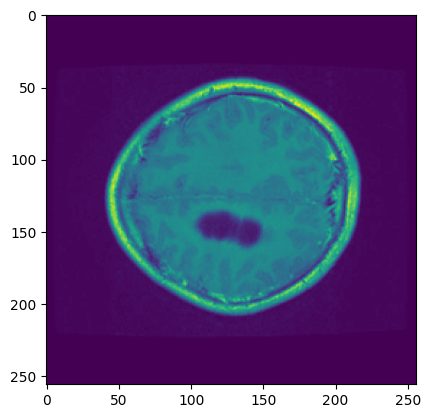

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(normalized_images[890])

In [11]:
#save labels
normalized_labels=[]
for i in range(0,708):
    normalized_labels.append(1)
for j in range(708,2134):
    normalized_labels.append(2)
for k in range(2134,3064):
    normalized_labels.append(3)


In [12]:
#change names 
x=[]
x=normalized_images
y=[]
y=normalized_labels

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [18]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape, y_test.shape)

(2451, 256, 256, 1) (2451,)
(2451, 256, 256, 1) (613,)


In [25]:
import numpy as np
from tensorflow.keras.utils import to_categorical
unique_values = np.unique(y_train)
print("Unique values in y_train:", unique_values)
y_train = y_train - 1
y_test = y_test - 1

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print("Shape of y_train after one-hot encoding:", y_train.shape)
print("Shape of y_test after one-hot encoding:", y_test.shape)

Unique values in y_train: [1 2 3]
Shape of y_train after one-hot encoding: (2451, 3)
Shape of y_test after one-hot encoding: (613, 3)


Model Definition

CNN

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
model_CNN = Sequential([
    Conv2D(256, (3,3), activation='relu', input_shape=(256, 256, 1)),
    AveragePooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    Dropout(0.5),
    MaxPooling2D(3,3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(5,5),
    Flatten(),
    Dense(3, activation='softmax')
])
model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_CNN = model_CNN.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 3385s 44s/step - accuracy: 0.5893 - loss: 0.8668 - val_accuracy: 0.6982 - val_loss: 0.6857
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 3672s 48s/step - accuracy: 0.7712 - loss: 0.5404 - val_accuracy: 0.8238 - val_loss: 0.5373
Epoch 3/5
28/77 ━━━━━━━━━━━━━━━━━━━━ 48:11 59s/step - accuracy: 0.7977 - loss: 0.4480

In [31]:
print(x_train.shape, y_train.shape)


(2451, 256, 256, 1) (2451, 3)
